# Problem 2: Contour Plots

Assignment and target figure from [Earth and Environmental Data Science](https://earth-env-data-science.github.io/assignments/more_matplotlib.html).

Target size figure is 920 x 423 pixels.

**Target Figure:**

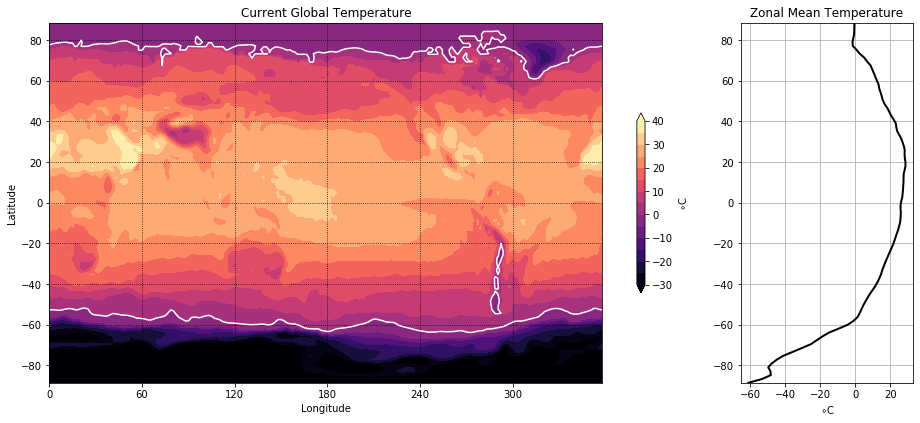

## Code provided by tutorial

In [1]:
import xarray as xr
ds_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
ds = xr.open_dataset(ds_url, decode_times=False)

In [2]:
temp = ds.temp[-1].values - 273.15
lon = ds.X.values
lat = ds.Y.values

## Code written by myself:

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
monitor_dpi = 93                       # DPI of monitor I am using
target_size = (920, 423)               # Size of target figure in pixels
figsize = (920 / 93, 423 / 93)         # Set figsize in inches which will produce a figure of the same size in pixels as the target figure
figsize

(9.89247311827957, 4.548387096774194)

In [5]:
clevels = np.arange(-30, 45, 5)
xticks_0 =  np.arange(0, 360, 60)
yticks_0 = np.arange(-80, 100, 20)

xticks_1 =  np.arange(-60, 40, 20)
yticks_1 = np.arange(-80, 100, 20)

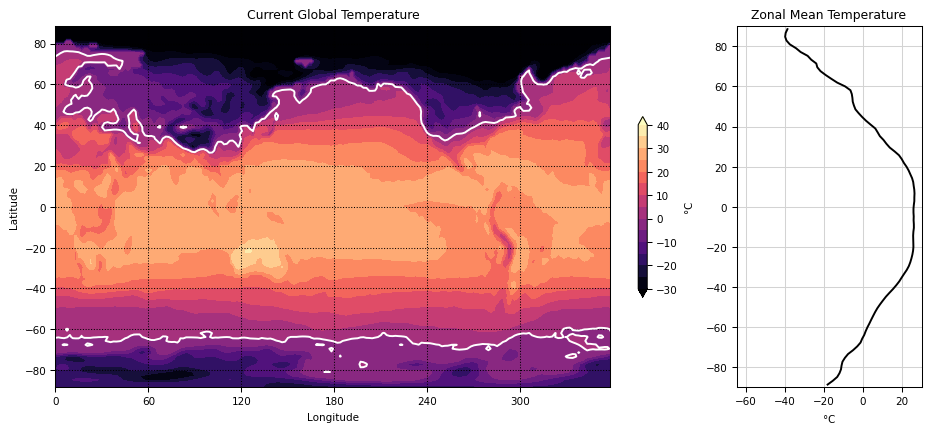

In [12]:
plt.rcParams.update({'font.size': 8})
plt.rcParams.update({'lines.linewidth': 1.5})

fig, ax = plt.subplots(figsize = figsize, dpi = monitor_dpi, ncols = 2, facecolor = 'white', layout = 'constrained',
                       gridspec_kw = {'width_ratios': [3, 1]})

cf0 = ax[0].contourf(lon, lat, temp, clevels, cmap='magma', extend='both')
cf1 = ax[0].contour(lon, lat, temp, 0, colors = 'white')

ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].set_title('Current Global Temperature')
ax[0].set_xticks(xticks_0)
ax[0].set_yticks(yticks_0)
ax[0].grid(which = 'major', linestyle = 'dotted', color = 'k')

cbar = plt.colorbar(cf0, ax = ax[0], shrink = 0.5)
cbar.set_label('$\degree$C')

ax[1].plot(temp.mean(axis = 1), lat, color = 'k')

ax[1].set_xlim([-65,30])
ax[1].set_ylim([-90,90])
ax[1].set_xticks(xticks_1)
ax[1].set_yticks(yticks_1)
ax[1].grid(which = 'major', linestyle = '-', color = 'lightgrey')
ax[1].set_title('Zonal Mean Temperature')
ax[1].set_xlabel('$\degree$C')

plt.savefig('Contour Assignment.png')